# IMPORTING LIBRARIES

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import warnings
warnings.filterwarnings("ignore")

# IMPORTING CSV FILE

In [44]:
diamond = pd.read_csv(r"C:\Users\Admin\Desktop\Quantum Learning Project\Diamond Price Prediction.csv")

# EDA

In [45]:
price = diamond["price"]
diamond.drop(["price"],axis=1,inplace =True)
diamond["price"]=price
diamond.drop(["Unnamed: 0"],axis=1,inplace =True)
diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [5]:
diamond.shape

(53940, 10)

In [6]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [46]:
diamond.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.798,0.474,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749,1.433,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457,2.234,43.0,56.00,57.00,59.00,95.00
x,53940.0,5.731,1.122,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.735,1.142,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.539,0.706,0.0,2.91,3.53,4.04,31.80
price,53940.0,3932.800,3989.440,326.0,950.00,2401.00,5324.25,18823.00


In [8]:
# From below it's confirmed that there is no null/nan data in the company dataset.

diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [9]:
# Removing duplicates from dataset.

print(diamond.duplicated().sum())
diamond.drop_duplicates(inplace = True)
print(diamond.duplicated().sum())

146
0


In [10]:
diamond.shape

(53794, 10)

# DATA VISUALIZATION

Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: cut, dtype: int64


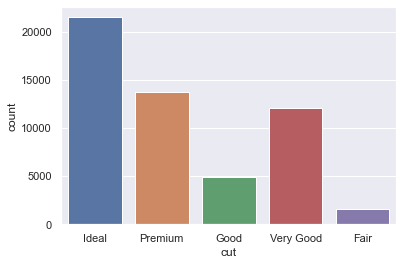

In [11]:
print(diamond["cut"].value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="cut", data=diamond)

G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: color, dtype: int64


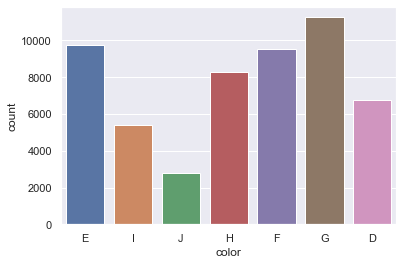

In [12]:
print(diamond["color"].value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="color", data=diamond)

SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: clarity, dtype: int64


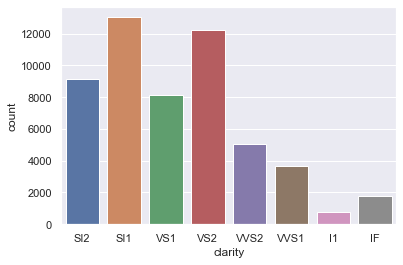

In [13]:
print(diamond["clarity"].value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="clarity", data=diamond)

<AxesSubplot:xlabel='price', ylabel='Density'>

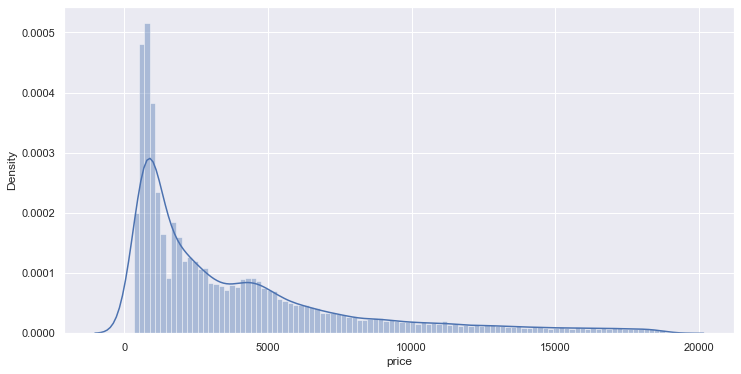

In [14]:
plt.figure(figsize=(12,6))
sns.distplot(diamond['price'],bins=100,kde=True)

<AxesSubplot:xlabel='carat', ylabel='Density'>

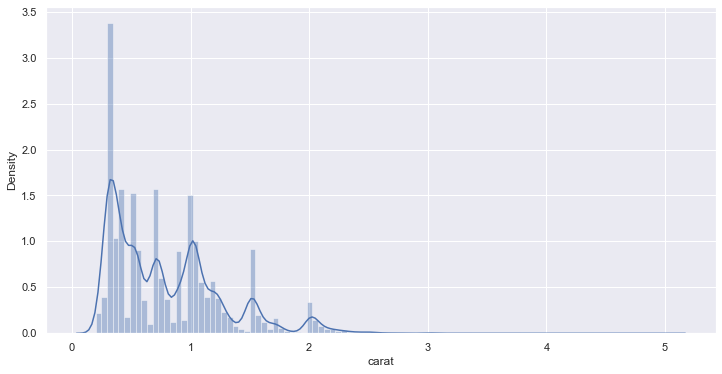

In [15]:
plt.figure(figsize=(12,6))
sns.distplot(diamond['carat'],bins=100,kde=True)

<AxesSubplot:xlabel='depth', ylabel='Density'>

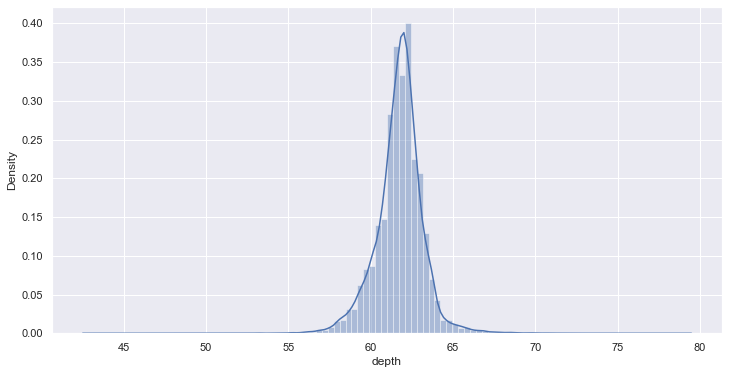

In [16]:
plt.figure(figsize=(12,6))
sns.distplot(diamond['depth'],bins=100,kde=True)

<AxesSubplot:xlabel='table', ylabel='Density'>

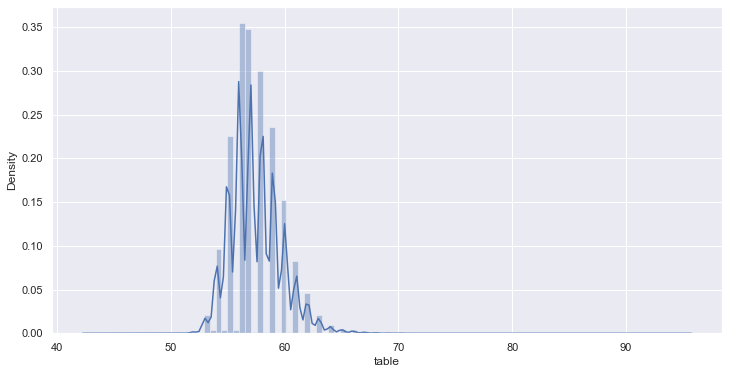

In [17]:
plt.figure(figsize=(12,6))
sns.distplot(diamond['table'],bins=100,kde=True)

<AxesSubplot:xlabel='z', ylabel='Density'>

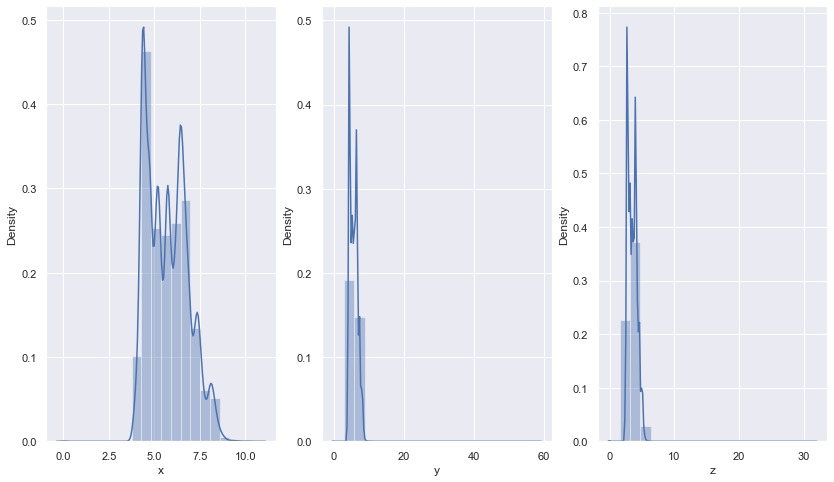

In [18]:
plt.figure(figsize=(14,8))
plt.subplot(1,3,1)
sns.distplot(diamond['x'],bins=20,kde=True)
plt.subplot(1,3,2)
sns.distplot(diamond['y'],bins=20,kde=True)
plt.subplot(1,3,3)
sns.distplot(diamond['z'],bins=20,kde=True)

# OUTLIER REMOVAL

In [19]:
# To check skewness in diamond dataset

skewdata = diamond.skew(axis=0,skipna=True)
skewdata.sort_values(axis=0,ascending=True)

depth   -0.114250
x        0.379624
table    0.792227
carat    1.113651
z        1.529023
price    1.618240
y        2.445768
dtype: float64

#### From describe() function above, after comparing min,max and quartile rage , there was a huge difference in the values which were indicators of outlier. 
#### From above data here i focus on the given column: carat, z, price, y.                

In [20]:
l1 = list(diamond[diamond['y']>10].index.values) #[24067,25998,27415,27630,49189]
l2 = list(diamond[diamond['z']>6].index.values) #[23644,24328,25999,26194,26431,26444,26534,27130,27679,48410]
l3 = list(diamond[diamond['carat']>2].index.values)
l4 = list(diamond[diamond['price']>12000].index.values)

l = l1+l2+l3+l4
l = list(set(l))
len(l)

3676

In [21]:
d = diamond.copy()

In [22]:
# Droping the above columns' specific rows to remove outlier.
d.drop(l,axis=0,inplace=True)
d.shape

(50118, 10)

In [23]:
# After removing outlier from the dataset. This is final skewness as after that 
skewdata = d.skew(axis=0,skipna=True)
skewdata.sort_values(axis=0,ascending=True)

depth   -0.149693
z        0.180560
y        0.204777
x        0.206748
carat    0.670828
table    0.736493
price    1.199385
dtype: float64

#### After outlier removal.

<AxesSubplot:xlabel='carat', ylabel='Density'>

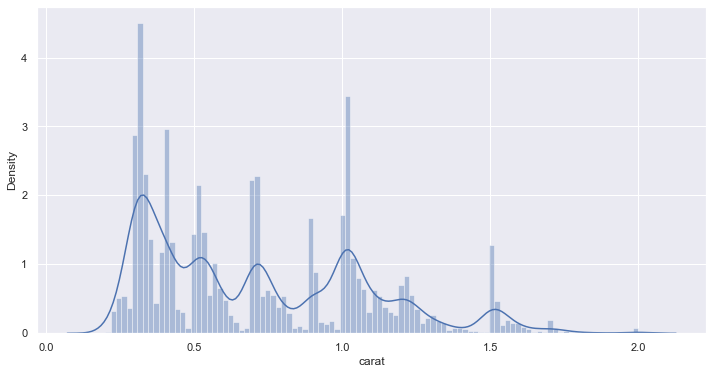

In [24]:
plt.figure(figsize=(12,6))
sns.distplot(d['carat'],bins=100,kde=True)

<AxesSubplot:xlabel='price', ylabel='Density'>

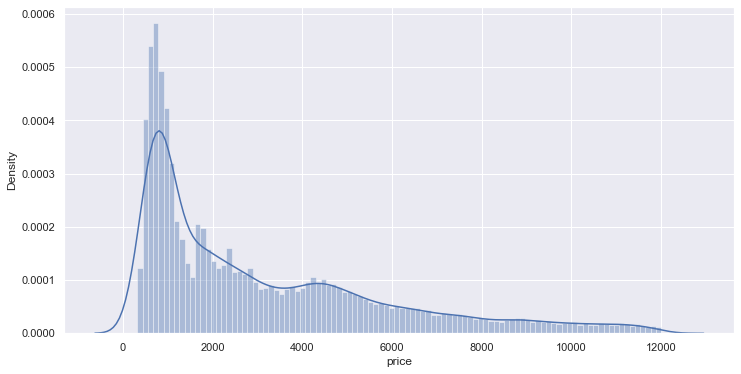

In [25]:
plt.figure(figsize=(12,6))
sns.distplot(d['price'],bins=100,kde=True)

<AxesSubplot:xlabel='z', ylabel='Density'>

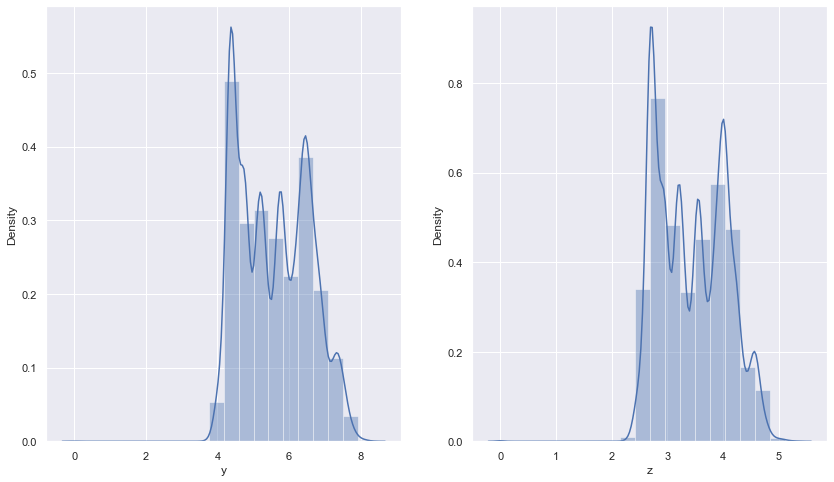

In [26]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
sns.distplot(d['y'],bins=20,kde=True)
plt.subplot(1,2,2)
sns.distplot(d['z'],bins=20,kde=True)

In [27]:
dmond = d.copy()

In [28]:
dmond.shape

(50118, 10)

# LABEL ENCODING FOR CATEGORICAL DATA

In [29]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
dmond["cut"] = labelencoder.fit_transform(dmond["cut"])
dmond["color"] = labelencoder.fit_transform(dmond["color"])
dmond["clarity"] = labelencoder.fit_transform(dmond["clarity"])
dmond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335


# MODEL BUILDING AND TESTING

In [30]:
y = dmond["price"]
x = dmond.drop(['price'],axis=1)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.33)

In [32]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

LR = LinearRegression().fit(x_train,y_train)
print(LR.score(x_train,y_train))
print(LR.score(x_test,y_test))

0.8845963445104638
0.8852707894283975


In [33]:
pred_lr = LR.predict(x_train)
mean_squared_error(y_train,pred_lr,squared=False)

934.0748518805977

In [34]:
pred_LR = LR.predict(x_test)
mean_squared_error(y_test,pred_LR,squared=False)

933.0015679569811

In [35]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor().fit(x_train, y_train)
print(RFR.score(x_train,y_train))
print(RFR.score(x_test,y_test))

0.9973161723080427
0.9814860163365402


In [36]:
pred_ = RFR.predict(x_train)
mean_squared_error(y_train,pred_,squared=False)

142.4456567023379

In [37]:
pred_RFR = RFR.predict(x_test)
mean_squared_error(y_test,pred_RFR,squared=False)

374.7963122278667

In [38]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train, y_train)
print("Train accuracy=",xgb.score(x_train, y_train))
xgb_pred = xgb.predict(x_test)
print ("Test accuracy=",xgb.score(x_test,y_test))

Train accuracy= 0.9903624168789533
Test accuracy= 0.982312126406889


In [39]:
pred_xgb = xgb.predict(x_train)
mean_squared_error(y_train,pred_xgb,squared=False)

269.9329899677164

In [40]:
pred_x = xgb.predict(x_test)
mean_squared_error(y_test,pred_x,squared=False)

366.3390238793058